一元线性回归：
只有一个自变量（特征)
y=θ0​+θ1​x+ϵ
多元线性回归就是：用 多个特征的线性组合 来预测目标值。
y=θ0​+θ1​x1​+θ2​x2​+⋯+θn​xn​+ϵ



正则化：
在多元线性回归中，如果：
特征数量很多（高维），特征之间存在强相关（多重共线性），或者我们过度拟合了训练数据，模型会出现过拟合（在训练集上表现好，但在测试集上表现差）。
为了缓解这种问题，我们在损失函数（MSE）里加一个惩罚项，限制参数 θ 的大小，使模型更简单、更稳健，这就是 正则化。

2. 常见的两种正则化方法
(1) Ridge 回归（L2 正则化）
J(θ)=2m1​i=1∑m​(hθ​(x(i))−y(i))2+λj=1∑n​θj2​
特点：
在最小二乘的基础上，加上了参数平方和作为惩罚。
惩罚大系数，让所有参数趋向于较小，但不会变成 0。
适合特征相关性较强时，用来缓解多重共线性。
(2) Lasso 回归（L1 正则化）
J(θ)=2m1​i=1∑m​(hθ​(x(i))−y(i))2+λj=1∑n​∣θj​∣
特点：
加入参数绝对值和作为惩罚。
一些系数会被压缩到 完全为 0 → 起到 特征选择 的作用。
更加稀疏（模型简单）。
3. λ（正则化强度）
λ=0 → 退化成普通线性回归（无正则化）。
λ 大 → 模型参数被压缩得很小，欠拟合风险增加。
合理选择 λ 可以提升泛化能力（常用交叉验证确定）。

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ---------------------------
# 1. 生成模拟数据
# ---------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 3)
y = 4 + 3*X[:,0] + 0.5*X[:,1] + np.random.randn(100)

# ---------------------------
# 2. 划分训练集和测试集
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3. 特征标准化
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 4. 创建回归模型
# ---------------------------
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
elastic_reg = ElasticNet(alpha=0.5, l1_ratio=0.5)

# ---------------------------
# 5. 训练模型
# ---------------------------
lin_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)
elastic_reg.fit(X_train_scaled, y_train)

# ---------------------------
# 6. 对测试集进行预测
# ---------------------------
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
y_pred_elastic = elastic_reg.predict(X_test_scaled)

# ---------------------------
# 7. 定义评估函数（增加输出预测值）
# ---------------------------
def evaluate(name, y_test, y_pred, model):
    print(f"=== {name} ===")
    print("R² (决定系数):", model.score(X_test_scaled, y_test))
    print("MSE (均方误差):", mean_squared_error(y_test, y_pred))
    print("Coef (回归系数):", model.coef_)
    print("Intercept (截距):", model.intercept_)
    print("Predictions (测试集预测值):", y_pred)  # 新增：输出预测值
    print()

# ---------------------------
# 8. 输出评估结果
# ---------------------------
evaluate("Linear Regression", y_test, y_pred_lin, lin_reg)
evaluate("Ridge Regression", y_test, y_pred_ridge, ridge_reg)
evaluate("Lasso Regression", y_test, y_pred_lasso, lasso_reg)
evaluate("ElasticNet Regression", y_test, y_pred_elastic, elastic_reg)


=== Linear Regression ===
R² (决定系数): 0.6467585594111478
MSE (均方误差): 2.0173924806102965
Coef (回归系数): [1.72992666 0.28779869 0.19827223]
Intercept (截距): 7.550679218518864
Predictions (测试集预测值): [ 9.65982707  9.13525782  8.35251642  6.85042316  5.60592816  6.24945338
  5.56832075 11.16699269  7.82689313  7.58312056  8.47878719  5.82663381
 10.098187    5.03943843 10.20076464  9.31887185 10.49057674  7.85534532
  6.33466268  8.3937046 ]

=== Ridge Regression ===
R² (决定系数): 0.645599796937697
MSE (均方误差): 2.0240102735194645
Coef (回归系数): [1.70812126 0.28470447 0.19323882]
Intercept (截距): 7.550679218518864
Predictions (测试集预测值): [ 9.63372727  9.11372804  8.34123603  6.857332    5.62610956  6.26601313
  5.59738691 11.11838004  7.8264912   7.58128     8.47125031  5.84627401
 10.06557755  5.06892328 10.16450373  9.2987115  10.45098975  7.85153276
  6.34751564  8.38342749]

=== Lasso Regression ===
R² (决定系数): 0.6464418873516744
MSE (均方误差): 2.019201022186098
Coef (回归系数): [1.62032102 0.18463099 0.07993

R²：Linear、Ridge、Lasso 都在 0.640.65，说明模型可以解释约 6465% 的目标变量方差。ElasticNet 下降到 0.55，欠拟合明显。

MSE：Linear 最小，ElasticNet 最大。说明 ElasticNet 预测误差增加。

系数收缩情况：

Ridge：L2 正则化，系数略微缩小，但不会置零。

Lasso：L1 正则化，一些系数被大幅压缩，尤其是第三个特征（0.08）。

ElasticNet：L1+L2 正则化混合，第三个特征被完全压为 0，可能过度惩罚特征 → 预测性能下降。


✅ 总结

Linear 和 Ridge 在这个数据集上表现最好。

Lasso 适合特征选择，但 alpha 需调小。

ElasticNet 过度正则化导致欠拟合，不推荐当前参数。

预测值在 5~11 左右，整体趋势与真实值一致，但有一定误差，可以用残差或阈值来量化“预测对错”。

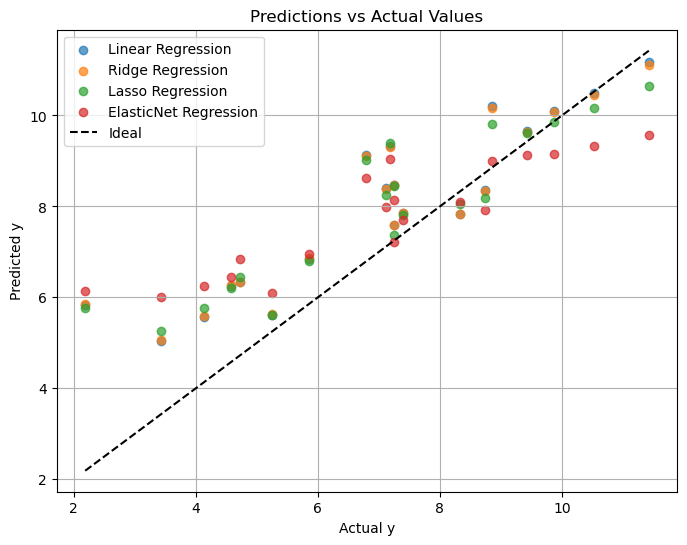

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 真实值 vs 预测值散点
plt.scatter(y_test, y_pred_lin, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", alpha=0.7)
plt.scatter(y_test, y_pred_elastic, label="ElasticNet Regression", alpha=0.7)

# 理想拟合参考线（y = x）
min_y = min(y_test.min(), y_pred_lin.min())
max_y = max(y_test.max(), y_pred_lin.max())
plt.plot([min_y, max_y], [min_y, max_y], 'k--', label="Ideal")

plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predictions vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()


接近虚线 y=x 的点说明预测值越接近真实值 → 拟合越好。

离线越远 的点说明预测误差大。

通过颜色和标签，可以直观看出四种模型的拟合效果：

Linear 和 Ridge 点最接近 y=x，拟合最好。

Lasso 稍微偏离，部分系数被压缩。

ElasticNet 离线最远，欠拟合明显。